<a href="https://colab.research.google.com/github/Romain-Laine/ZeroCostDL4Mic/blob/ColabCommitTest/Colab_notebooks/Beta%20notebooks/U-Net_2D_ZeroCostDL4Mic_exportDeepImageJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **U-Net (2D)**
---

<font size = 4>U-Net is an encoder-decoder network architecture originally used for image segmentation, first published by [Ronneberger *et al.*](https://arxiv.org/abs/1505.04597). The first half of the U-Net architecture is a downsampling convolutional neural network which acts as a feature extractor from input images. The other half upsamples these results and restores an image by combining results from downsampling with the upsampled images.

<font size = 4> **This particular notebook enables image segmentation of 2D dataset. If you are interested in 3D dataset, you should use the 3D U-Net notebook instead.**

---
<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the Zero-Cost Deep-Learning to Enhance Microscopy project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4>This notebook is largely based on the papers: 

<font size = 4>**U-Net: Convolutional Networks for Biomedical Image Segmentation** by Ronneberger *et al.*  published on arXiv in 2015 (https://arxiv.org/abs/1505.04597)

<font size = 4>and 

<font size = 4>**U-Net: deep learning for cell counting, detection, and morphometry** by Thorsten Falk *et al.* in Nature Methods 2019
(https://www.nature.com/articles/s41592-018-0261-2)
And source code found in: https://github.com/zhixuhao/unet by *Zhixuhao*

<font size = 4>**Please also cite this original paper when using or developing this notebook.** 

# **How to use this notebook?**

---

<font size = 4>Video describing how to use our notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook



---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

# **0. Before getting started**
---

<font size = 4>Before you run the notebook, please ensure that you are logged into your Google account and have the training and/or data to process in your Google Drive.

<font size = 4>For U-Net to train, **it needs to have access to a paired training dataset corresponding to images and their corresponding masks**. Information on how to generate a training dataset is available in our Wiki page: https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki

<font size = 4>**We strongly recommend that you generate extra paired images. These images can be used to assess the quality of your trained model (Quality control dataset)**. The quality control assessment can be done directly in this notebook.

<font size = 4>Additionally, the corresponding Training_source and Training_target files need to have **the same name**.

<font size = 4>Here's a common data structure that can work:
*   Experiment A
    - **Training dataset**
      - Training_source
        - img_1.tif, img_2.tif, ...
      - Training_target
        - img_1.tif, img_2.tif, ...
    - **Quality control dataset**
     - Training_source
        - img_1.tif, img_2.tif
      - Training_target 
        - img_1.tif, img_2.tif
    - **Data to be predicted**
    - **Results**

---
<font size = 4>**Important note**

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---

# **1. Initialise the Colab session**




---







## **1.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelator: GPU** *(Graphics processing unit)*


In [ ]:
#@markdown ##Run this cell to check if you have GPU access
%tensorflow_version 1.x
print('Good job!')

import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')
  !nvidia-smi

# from tensorflow.python.client import device_lib 
# device_lib.list_local_devices()

# print the tensorflow version
print('Tensorflow version is ' + str(tf.__version__))


You have GPU access
Tue Sep 29 09:39:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    32W /  70W |   9859MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                    

## **1.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [ ]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **2. Install U-Net dependencies**
---


In [ ]:
#@markdown ##Play to install U-Net dependencies

#As this notebokk depends mostly on keras which runs a tensorflow backend (which in turn is pre-installed in colab)
#only the data library needs to be additionally installed.
%tensorflow_version 1.x
import tensorflow
# print(tensorflow.__version__)
# print("Tensorflow enabled.")


#!pip install keras==2.2.5
!pip install data

# Keras imports
from keras import models
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, UpSampling2D
from keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger # we currently don't use any other callbacks from ModelCheckpoints
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import backend as keras

# General import
from __future__ import print_function
import numpy as np
import pandas as pd
import os
import glob
from skimage import img_as_ubyte, io, transform
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from pathlib import Path
import shutil
import random
import time
import csv
import sys
from math import ceil

# Imports for QC
from PIL import Image
from scipy import signal
from scipy import ndimage
from sklearn.linear_model import LinearRegression
from skimage.util import img_as_uint
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr

# For sliders and dropdown menu and progress bar
from ipywidgets import interact
import ipywidgets as widgets
# from tqdm import tqdm
from tqdm.notebook import tqdm

from sklearn.feature_extraction import image
from skimage import img_as_ubyte, io, transform
from skimage.util.shape import view_as_windows

# Suppressing some warnings
import warnings
warnings.filterwarnings('ignore')



def create_patches(Training_source, Training_target, patch_width, patch_height):
  """
  Function creates patches from the Training_source and Training_target images. 
  The steps parameter indicates the offset between patches and, if integer, is the same in x and y.
  Saves all created patches in two new directories in the /content folder.

  Returns: - Two paths to where the patches are now saved
  """
  DEBUG = False

  Patch_source = os.path.join('/content','img_patches')
  Patch_target = os.path.join('/content','mask_patches')
  Patch_rejected = os.path.join('/content','rejected')
  

  #Here we save the patches, in the /content directory as they will not usually be needed after training
  if os.path.exists(Patch_source):
    shutil.rmtree(Patch_source)
  if os.path.exists(Patch_target):
    shutil.rmtree(Patch_target)
  if os.path.exists(Patch_rejected):
    shutil.rmtree(Patch_rejected)

  os.mkdir(Patch_source)
  os.mkdir(Patch_target)
  os.mkdir(Patch_rejected) #This directory will contain the images that have too little signal.
  

  all_patches_img = np.empty([0,patch_width, patch_height])
  all_patches_mask = np.empty([0,patch_width, patch_height])

  for file in os.listdir(Training_source):

    img = io.imread(os.path.join(Training_source, file))
    mask = io.imread(os.path.join(Training_target, file),as_gray=True)

    if DEBUG:
      print(file)
      print(img.dtype)

    # Using view_as_windows with step size equal to the patch size to ensure there is no overlap
    patches_img = view_as_windows(img, (patch_width, patch_height), (patch_width, patch_height))
    patches_mask = view_as_windows(mask, (patch_width, patch_height), (patch_width, patch_height))
    #the shape of patches_img and patches_mask will be (number of patches along x, number of patches along y,patch_width,patch_height)

    all_patches_img = np.concatenate((all_patches_img, patches_img.reshape(patches_img.shape[0]*patches_img.shape[1], patch_width,patch_height)), axis = 0)
    all_patches_mask = np.concatenate((all_patches_mask, patches_mask.reshape(patches_mask.shape[0]*patches_mask.shape[1], patch_width,patch_height)), axis = 0)

  number_of_patches = all_patches_img.shape[0]
  print('number of patches: '+str(number_of_patches))

  if DEBUG:
    print(all_patches_img.shape)
    print(all_patches_img.dtype)

  for i in range(number_of_patches):
    img_save_path = os.path.join(Patch_source,'patch_'+str(i)+'.tif')
    mask_save_path = os.path.join(Patch_target,'patch_'+str(i)+'.tif')

    # if the mask conatins at least 2% of its total number pixels as mask, then go ahead and save the images
    pixel_threshold_array = sorted(all_patches_mask[i].flatten())
    if pixel_threshold_array[int(round(len(pixel_threshold_array)*0.98))]>0:
      io.imsave(img_save_path, img_as_ubyte(normalizeMinMax(all_patches_img[i])))
      io.imsave(mask_save_path, convert2Mask(normalizeMinMax(all_patches_mask[i]),0))
    else:
      io.imsave(Patch_rejected+'/patch_'+str(i)+'_image.tif', img_as_ubyte(normalizeMinMax(all_patches_img[i])))
      io.imsave(Patch_rejected+'/patch_'+str(i)+'_mask.tif', convert2Mask(normalizeMinMax(all_patches_mask[i]),0))

  return Patch_source, Patch_target


def estimatePatchSize(data_path, max_width = 512, max_height = 512):

  files = os.listdir(data_path)
  
  # Get the size of the first image found in the folder and initialise the variables to that
  n = 0 
  while os.path.isdir(os.path.join(data_path, files[n])):
    n += 1
  (height_min, width_min) = Image.open(os.path.join(data_path, files[n])).size

  # Screen the size of all dataset to find the minimum image size
  for file in files:
    if not os.path.isdir(os.path.join(data_path, file)):
      (height, width) = Image.open(os.path.join(data_path, file)).size
      if width < width_min:
        width_min = width
      if height < height_min:
        height_min = height
  
  # Find the power of patches that will fit within the smallest dataset
  width_min, height_min = (fittingPowerOfTwo(width_min), fittingPowerOfTwo(height_min))

  # Clip values at maximum permissible values
  if width_min > max_width:
    width_min = max_width

  if height_min > max_height:
    height_min = max_height
  
  return (width_min, height_min)

def fittingPowerOfTwo(number):
  n = 0
  while 2**n <= number:
    n += 1 
  return 2**(n-1)


def getClassWeights(Training_target_path):

  Mask_dir_list = os.listdir(Training_target_path)
  number_of_dataset = len(Mask_dir_list)

  class_count = np.zeros(2, dtype=int)
  for i in tqdm(range(number_of_dataset)):
    mask = io.imread(os.path.join(Training_target_path, Mask_dir_list[i]))
    mask = normalizeMinMax(mask)
    class_count[0] += mask.shape[0]*mask.shape[1] - mask.sum()
    class_count[1] += mask.sum()

  n_samples = class_count.sum()
  n_classes = 2

  class_weights = n_samples / (n_classes * class_count)
  return class_weights

def weighted_binary_crossentropy(class_weights):

    def _weighted_binary_crossentropy(y_true, y_pred):
        binary_crossentropy = keras.binary_crossentropy(y_true, y_pred)
        weight_vector = y_true * class_weights[1] + (1. - y_true) * class_weights[0]
        weighted_binary_crossentropy = weight_vector * binary_crossentropy

        return keras.mean(weighted_binary_crossentropy)

    return _weighted_binary_crossentropy


def save_augment(datagen,orig_img,dir_augmented_data="/content/augment"):
  """
  Saves a subset of the augmented data for visualisation, by default in /content.

  This is adapted from: https://fairyonice.github.io/Learn-about-ImageDataGenerator.html
  
  """
  try:
    os.mkdir(dir_augmented_data)
  except:
        ## if the preview folder exists, then remove
        ## the contents (pictures) in the folder
    for item in os.listdir(dir_augmented_data):
      os.remove(dir_augmented_data + "/" + item)

    ## convert the original image to array
  x = img_to_array(orig_img)
    ## reshape (Sampke, Nrow, Ncol, 3) 3 = R, G or B
    #print(x.shape)
  x = x.reshape((1,) + x.shape)
    #print(x.shape)
    ## -------------------------- ##
    ## randomly generate pictures
    ## -------------------------- ##
  i = 0
    #We will just save 5 images,
    #but this can be changed, but note the visualisation in 3. currently uses 5.
  Nplot = 5
  for batch in datagen.flow(x,batch_size=1,
                            save_to_dir=dir_augmented_data,
                            save_format='tif',
                            seed=42):
    i += 1
    if i > Nplot - 1:
      break

# Generators
def buildDoubleGenerator(image_datagen, mask_datagen, image_folder_path, mask_folder_path, subset, batch_size, target_size):
  '''
  Can generate image and mask at the same time use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
  
  datagen: ImageDataGenerator 
  subset: can take either 'training' or 'validation'
  '''
  seed = 1
  image_generator = image_datagen.flow_from_directory(
      os.path.dirname(image_folder_path),
      classes = [os.path.basename(image_folder_path)],
      class_mode = None,
      color_mode = "grayscale",
      target_size = target_size,
      batch_size = batch_size,
      subset = subset,
      interpolation = "bicubic",
      seed = seed)
  
  mask_generator = mask_datagen.flow_from_directory(
      os.path.dirname(mask_folder_path),
      classes = [os.path.basename(mask_folder_path)],
      class_mode = None,
      color_mode = "grayscale",
      target_size = target_size,
      batch_size = batch_size,
      subset = subset,
      interpolation = "nearest",
      seed = seed)
  
  this_generator = zip(image_generator, mask_generator)
  for (img,mask) in this_generator:
      # img,mask = adjustData(img,mask)
      yield (img,mask)


def prepareGenerators(image_folder_path, mask_folder_path, datagen_parameters, batch_size = 4, target_size = (512, 512)):
  image_datagen = ImageDataGenerator(**datagen_parameters, preprocessing_function = normalizePercentile)
  mask_datagen = ImageDataGenerator(**datagen_parameters, preprocessing_function = normalizeMinMax)

  train_datagen = buildDoubleGenerator(image_datagen, mask_datagen, image_folder_path, mask_folder_path, 'training', batch_size, target_size)
  validation_datagen = buildDoubleGenerator(image_datagen, mask_datagen, image_folder_path, mask_folder_path, 'validation', batch_size, target_size)

  return (train_datagen, validation_datagen)


# Normalization functions from Martin Weigert
def normalizePercentile(x, pmin=1, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    """This function is adapted from Martin Weigert"""
    """Percentile-based image normalization."""

    mi = np.percentile(x,pmin,axis=axis,keepdims=True)
    ma = np.percentile(x,pmax,axis=axis,keepdims=True)
    return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)


def normalize_mi_ma(x, mi, ma, clip=False, eps=1e-20, dtype=np.float32):#dtype=np.float32
    """This function is adapted from Martin Weigert"""
    if dtype is not None:
        x   = x.astype(dtype,copy=False)
        mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
        ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
        eps = dtype(eps)

    try:
        import numexpr
        x = numexpr.evaluate("(x - mi) / ( ma - mi + eps )")
    except ImportError:
        x =                   (x - mi) / ( ma - mi + eps )

    if clip:
        x = np.clip(x,0,1)

    return x



# Simple normalization to min/max fir the Mask
def normalizeMinMax(x, dtype=np.float32):
  x = x.astype(dtype,copy=False)
  x = (x - np.amin(x)) / (np.amax(x) - np.amin(x))
  return x


# def predictionGenerator(Data_path, target_size = (256,256), as_gray = True):
#   for filename in os.listdir(Data_path):
#     if not os.path.isdir(os.path.join(Data_path, filename)):
#       img = io.imread(os.path.join(Data_path, filename), as_gray = as_gray)
#       img = normalizePercentile(img)
#       # img = img/255 # WARNING: this is expecting 8bit images
#       img = transform.resize(img,target_size, preserve_range=True, anti_aliasing=True, order = 1) # liner interpolation
#       img = np.reshape(img,img.shape+(1,))
#       img = np.reshape(img,(1,)+img.shape)
#     yield img


# def predictionResize(Data_path, predictions):
#   resized_predictions = []
#   for (i, filename) in enumerate(os.listdir(Data_path)):
#     if not os.path.isdir(os.path.join(Data_path, filename)):
#       img = Image.open(os.path.join(Data_path, filename))
#       (width, height) = img.size
#       resized_predictions.append(transform.resize(predictions[i], (height, width), preserve_range=True, anti_aliasing=True, order = 1))
#   return resized_predictions


# This is code outlines the architecture of U-net. The choice of pooling steps decides the depth of the network. 
def unet(pretrained_weights = None, input_size = (256,256,1), pooling_steps = 4, learning_rate = 1e-4, verbose=True, class_weights=np.ones(2)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    # Downsampling steps
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    
    if pooling_steps > 1:
      pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
      conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
      conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)

      if pooling_steps > 2:
        pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
        conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
        conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
        drop4 = Dropout(0.5)(conv4)
      
        if pooling_steps > 3:
          pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
          conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
          conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
          drop5 = Dropout(0.5)(conv5)

          #Upsampling steps
          up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
          merge6 = concatenate([drop4,up6], axis = 3)
          conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
          conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
          
    if pooling_steps > 2:
      up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop4))
      if pooling_steps > 3:
        up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
      merge7 = concatenate([conv3,up7], axis = 3)
      conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
      
    if pooling_steps > 1:
      up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv3))
      if pooling_steps > 2:
        up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
      merge8 = concatenate([conv2,up8], axis = 3)
      conv8 = Conv2D(128, 3, activation= 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    
    if pooling_steps == 1:
      up9 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv2))
    else:
      up9 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8)) #activation = 'relu'
    
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9) #activation = 'relu'
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9) #activation = 'relu'
    conv9 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9) #activation = 'relu'
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    # model.compile(optimizer = Adam(lr = learning_rate), loss = 'binary_crossentropy', metrics = ['acc'])
    model.compile(optimizer = Adam(lr = learning_rate), loss = weighted_binary_crossentropy(class_weights))


    if verbose:
      model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights);

    return model



def predict_as_tiles(Image_path, model):

  # Read the data in and normalize
  Image_raw = io.imread(Image_path, as_gray = True)
  Image_raw = normalizePercentile(Image_raw)

  # Get the patch size from the input layer of the model
  patch_size = model.layers[0].output_shape[1:3]

  # Pad the image with zeros if any of its dimensions is smaller than the patch size
  if Image_raw.shape[0] < patch_size[0] or Image_raw.shape[1] < patch_size[1]:
    Image = np.zeros((max(Image_raw.shape[0], patch_size[0]), max(Image_raw.shape[1], patch_size[1])))
    Image[0:Image_raw.shape[0], 0: Image_raw.shape[1]] = Image_raw
  else:
    Image = Image_raw

  # Calculate the number of patches in each dimension
  n_patch_in_width = ceil(Image.shape[0]/patch_size[0])
  n_patch_in_height = ceil(Image.shape[1]/patch_size[1])

  prediction = np.zeros(Image.shape)

  for x in range(n_patch_in_width):
    for y in range(n_patch_in_height):
      xi = patch_size[0]*x
      yi = patch_size[1]*y

      # If the patch exceeds the edge of the image shift it back 
      if xi+patch_size[0] >= Image.shape[0]:
        xi = Image.shape[0]-patch_size[0]

      if yi+patch_size[1] >= Image.shape[1]:
        yi = Image.shape[1]-patch_size[1]
      
      # Extract and reshape the patch
      patch = Image[xi:xi+patch_size[0], yi:yi+patch_size[1]]
      patch = np.reshape(patch,patch.shape+(1,))
      patch = np.reshape(patch,(1,)+patch.shape)

      # Get the prediction from the patch and paste it in the prediction in the right place
      predicted_patch = model.predict(patch, batch_size = 1)
      prediction[xi:xi+patch_size[0], yi:yi+patch_size[1]] = np.squeeze(predicted_patch)


  return prediction[0:Image_raw.shape[0], 0: Image_raw.shape[1]]
  



def saveResult(save_path, nparray, source_dir_list, prefix='', threshold=None):
  if not os.path.exists(save_path):
      os.makedirs(save_path)
  for (filename, image) in zip(source_dir_list, nparray):
      io.imsave(os.path.join(save_path, prefix+os.path.splitext(filename)[0]+'.tif'), img_as_ubyte(image)) # saving as unsigned 8-bit image
      
      # For masks, threshold the images and return 8 bit image
      if threshold is not None:
        mask = convert2Mask(image, threshold)
        io.imsave(os.path.join(save_path, prefix+'mask_'+os.path.splitext(filename)[0]+'.tif'), mask)


def convert2Mask(image, threshold):
  mask = img_as_ubyte(image, force_copy=True)
  mask[mask > threshold] = 255
  mask[mask <= threshold] = 0
  return mask


def getIoUvsThreshold(prediction_filepath, groud_truth_filepath):
  prediction = io.imread(prediction_filepath)
  ground_truth_image = img_as_ubyte(io.imread(groud_truth_filepath, as_gray=True), force_copy=True)

  threshold_list = []
  IoU_scores_list = []

  for threshold in range(0,256): 
    # Convert to 8-bit for calculating the IoU
    mask = img_as_ubyte(prediction, force_copy=True)
    mask[mask > threshold] = 255
    mask[mask <= threshold] = 0

    # Intersection over Union metric
    intersection = np.logical_and(ground_truth_image, np.squeeze(mask))
    union = np.logical_or(ground_truth_image, np.squeeze(mask))
    iou_score = np.sum(intersection) / np.sum(union)

    threshold_list.append(threshold)
    IoU_scores_list.append(iou_score)

  return (threshold_list, IoU_scores_list)



# -------------- Other definitions -----------
W  = '\033[0m'  # white (normal)
R  = '\033[31m' # red
prediction_prefix = 'Predicted_'


print('-------------------')
print('U-Net and dependencies installed.')


-------------------
U-Net and dependencies installed.


# **3. Select your parameters and paths**

---

##**3.1. Parameters and paths**
---

<font size = 5> **Paths for training data and models**

<font size = 4>**`Training_source`, `Training_target`:** These are the folders containing your source (e.g. EM images) and target files (segmentation masks). Enter the path to the source and target images for training. **These should be located in the same parent folder.**

<font size = 4>**`model_name`:** Use only my_model -style, not my-model. If you want to use a previously trained model, enter the name of the pretrained model (which should be contained in the trained_model -folder after training).

<font size = 4>**`model_path`**: Enter the path of the folder where you want to save your model.

<font size = 4>**`visual_validation_after_training`**: If you select this option, a random image pair will be set aside from your training set and will be used to display a predicted image of the trained network next to the input and the ground-truth. This can aid in visually assessing the performance of your network after training. **Note: Your training set size will decrease by 1 if you select this option.**

**Make sure the directories exist before entering them!**

<font size = 5> **Select training parameters**

<font size = 4>**`number_of_epochs`**: Choose more epochs for larger training sets. Observing how much the loss reduces between epochs during training may help determine the optimal value. **Default: 200**

<font size = 5>**Advanced parameters - experienced users only**

<font size = 4>**`batch_size`**: This parameter describes the amount of images that are loaded into the network per step. Smaller batchsizes may improve training performance slightly but may increase training time. If the notebook crashes while loading the dataset this can be due to a too large batch size. Decrease the number in this case. **Default: 4**

<font size = 4>**`number_of_steps`**: This number should be equivalent to the number of samples in the training set divided by the batch size, to ensure the training iterates through the entire training set. Smaller values can be used for testing. **Default: 6**

<font size = 4> **`pooling_steps`**: Choosing a different number of pooling layers can affect the performance of the network. Each additional pooling step will also two additional convolutions. The network can learn more complex information but is also more likely to overfit. Achieving best performance may require testing different values here. **Default: 2**

<font size = 4>**`percentage_validation`:**  Input the percentage of your training dataset you want to use to validate the network during training. **Default value: 10** 

<font size = 4>**`initial_learning_rate`:**  Input the initial value to be used as learning rate. **Default value: 0.0003**

<font size = 4>**`patch_width` and `patch_height`:** The notebook crops the data in patches of fixed size prior to training. The dimensions of the patches can be defined here. When `Use_Default_Advanced_Parameters` is selected, the largest 2^n x 2^n patch that fits in the smallest dataset is chosen. Larger patches than 512x512 should **NOT** be selected for network stability.



Default advanced parameters enabled
Training on patches of size (x,y): (512,512)
Creating patches...
number of patches: 23


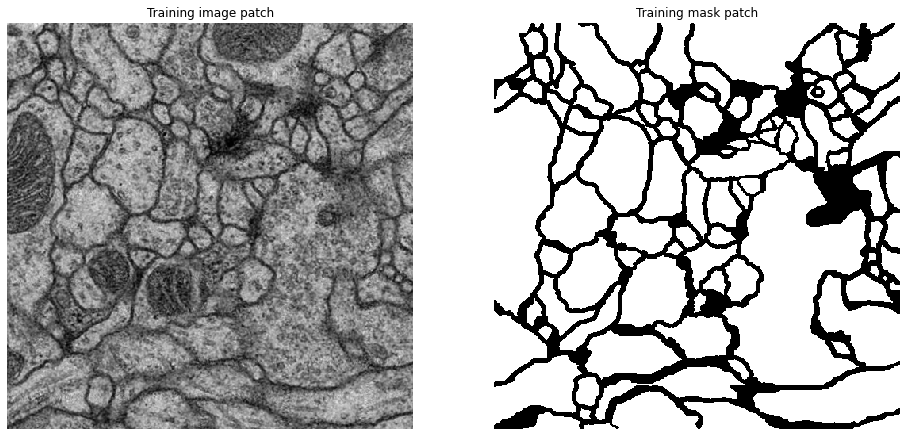

In [ ]:
# ------------- Initial user input ------------
#@markdown ###Path to training images:
Training_source = '/content/gdrive/My Drive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/data4UNet/zhixuhao/train/image' #@param {type:"string"}
Training_target = '/content/gdrive/My Drive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/data4UNet/zhixuhao/train/label' #@param {type:"string"}

model_name = 'UNet_EM' #@param {type:"string"}
model_path = '/content/gdrive/My Drive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic' #@param {type:"string"}

#@markdown ###Training parameters:
#@markdown Number of epochs
number_of_epochs =  200#@param {type:"number"}

#@markdown ###Advanced parameters:
Use_Default_Advanced_Parameters = True #@param {type:"boolean"}

#@markdown ###If not, please input:
batch_size =  4#@param {type:"integer"}
number_of_steps =  6#@param {type:"number"}
pooling_steps = 2 #@param [1,2,3,4]{type:"raw"}
percentage_validation =  10#@param{type:"number"}
initial_learning_rate = 0.0003 #@param {type:"number"}

patch_width =  512#@param{type:"number"}
patch_height =  512#@param{type:"number"}


# ------------- Initialising folder, variables and failsafes ------------
#  Create the folders where to save the model and the QC
full_model_path = os.path.join(model_path, model_name)
if os.path.exists(full_model_path):
  print(R+'!! WARNING: Folder already exists and will be overwritten !!'+W)

if (Use_Default_Advanced_Parameters): 
  print("Default advanced parameters enabled")
  batch_size = 4
  pooling_steps = 2
  percentage_validation = 10
  initial_learning_rate = 0.0003
  patch_width, patch_height = estimatePatchSize(Training_source)


#The create_patches function will create the two folders below
# Patch_source = '/content/img_patches'
# Patch_target = '/content/mask_patches'
print('Training on patches of size (x,y): ('+str(patch_width)+','+str(patch_height)+')')

#Create patches
print('Creating patches...')
Patch_source, Patch_target = create_patches(Training_source, Training_target, patch_width, patch_height)


# Here we disable pre-trained model by default (in case the next cell is not ran)
Use_pretrained_model = False
# Here we disable data augmentation by default (in case the cell is not ran)
Use_Data_augmentation = False

# ------------- Display ------------

#if not os.path.exists('/content/img_patches/'):
random_choice = random.choice(os.listdir(Patch_source))
x = io.imread(os.path.join(Patch_source, random_choice))

#os.chdir(Training_target)
y = io.imread(os.path.join(Patch_target, random_choice), as_gray=True)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, interpolation='nearest',cmap='gray')
plt.title('Training image patch')
plt.axis('off');

plt.subplot(1,2,2)
plt.imshow(y, interpolation='nearest',cmap='gray')
plt.title('Training mask patch')
plt.axis('off');




##**3.2. Data augmentation**

---

<font size = 4> Data augmentation can improve training progress by amplifying differences in the dataset. This can be useful if the available dataset is small since, in this case, it is possible that a network could quickly learn every example in the dataset (overfitting), without augmentation. Augmentation is not necessary for training and if the dataset is large the values can be set to 0.

<font size = 4> The augmentation options below are to be used as follows:

* <font size = 4> **shift**: a translation of the image by a fraction of the image size (width or height), **default: 10%**
* **zoom_range**: Increasing or decreasing the field of view. E.g. 10% will result in a zoom range of (0.9 to 1.1), with pixels added or interpolated, depending on the transformation, **default: 10%**
* **shear_range**: Shear angle in counter-clockwise direction, **default: 10%**
* **flip**: creating a mirror image along specified axis (horizontal or vertical), **default: True**
* **rotation_range**: range of allowed rotation angles in degrees (from 0 to *value*), **default: 180**

Parameters enabled
Here is what a subset of your augmentations looks like:


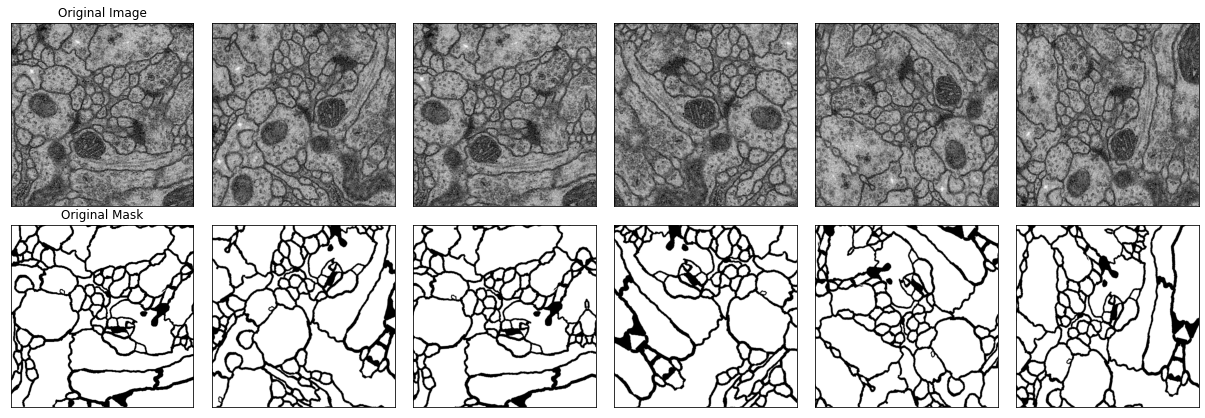

In [ ]:
#@markdown ##**Augmentation options**

Use_Data_augmentation = True #@param {type:"boolean"}
Use_Default_Augmentation_Parameters = True #@param {type:"boolean"}

if Use_Data_augmentation:
  if Use_Default_Augmentation_Parameters:
    horizontal_shift =  10 
    vertical_shift =  20 
    zoom_range =  10
    shear_range =  10
    horizontal_flip = True
    vertical_flip = True
    rotation_range =  180
#@markdown ###If you are not using the default settings, please provide the values below:

#@markdown ###**Image shift, zoom, shear and flip (%)**
  else:
    horizontal_shift =  10 #@param {type:"slider", min:0, max:100, step:1}
    vertical_shift =  10 #@param {type:"slider", min:0, max:100, step:1}
    zoom_range =  10 #@param {type:"slider", min:0, max:100, step:1}
    shear_range =  10 #@param {type:"slider", min:0, max:100, step:1}
    horizontal_flip = True #@param {type:"boolean"}
    vertical_flip = True #@param {type:"boolean"}

#@markdown ###**Rotate image within angle range (degrees):**
    rotation_range =  180 #@param {type:"slider", min:0, max:180, step:1}

#given behind the # are the default values for each parameter.

else:
  horizontal_shift =  0 
  vertical_shift =  0 
  zoom_range =  0
  shear_range =  0
  horizontal_flip = False
  vertical_flip = False
  rotation_range =  0


# Build the dict for the ImageDataGenerator
data_gen_args = dict(width_shift_range = horizontal_shift/100.,
                     height_shift_range = vertical_shift/100.,
                     rotation_range = rotation_range, #90
                     zoom_range = zoom_range/100.,
                     shear_range = shear_range/100.,
                     horizontal_flip = horizontal_flip,
                     vertical_flip = vertical_flip,
                     validation_split = percentage_validation/100,
                     fill_mode = 'reflect')



# ------------- Display ------------
dir_augmented_data_imgs="/content/augment_img"
dir_augmented_data_masks="/content/augment_mask"
random_choice = random.choice(os.listdir(Patch_source))
orig_img = load_img(os.path.join(Patch_source,random_choice))
orig_mask = load_img(os.path.join(Patch_target,random_choice))

augment_view = ImageDataGenerator(**data_gen_args)

if Use_Data_augmentation:
  print("Parameters enabled")
  print("Here is what a subset of your augmentations looks like:")
  save_augment(augment_view, orig_img, dir_augmented_data=dir_augmented_data_imgs)
  save_augment(augment_view, orig_mask, dir_augmented_data=dir_augmented_data_masks)

  fig = plt.figure(figsize=(15, 7))
  fig.subplots_adjust(hspace=0.0,wspace=0.1,left=0,right=1.1,bottom=0, top=0.8)

 
  ax = fig.add_subplot(2, 6, 1,xticks=[],yticks=[])        
  new_img=img_as_ubyte(normalizeMinMax(img_to_array(orig_img)))
  ax.imshow(new_img)
  ax.set_title('Original Image')
  i = 2
  for imgnm in os.listdir(dir_augmented_data_imgs):
    ax = fig.add_subplot(2, 6, i,xticks=[],yticks=[]) 
    img = load_img(dir_augmented_data_imgs + "/" + imgnm)
    ax.imshow(img)
    i += 1

  ax = fig.add_subplot(2, 6, 7,xticks=[],yticks=[])        
  new_mask=img_as_ubyte(normalizeMinMax(img_to_array(orig_mask)))
  ax.imshow(new_mask)
  ax.set_title('Original Mask')
  j=2
  for imgnm in os.listdir(dir_augmented_data_masks):
    ax = fig.add_subplot(2, 6, j+6,xticks=[],yticks=[]) 
    mask = load_img(dir_augmented_data_masks + "/" + imgnm)
    ax.imshow(mask)
    j += 1
  plt.show()

else:
  print("No augmentation will be used")


## **3.3. Using weights from a pre-trained model as initial weights**
---
<font size = 4>  Here, you can set the the path to a pre-trained model from which the weights can be extracted and used as a starting point for this training session. **This pre-trained model needs to be a U-Net model**. 

<font size = 4> This option allows you to perform training over multiple Colab runtimes or to do transfer learning using models trained outside of ZeroCostDL4Mic. **You do not need to run this section if you want to train a network from scratch**.

<font size = 4> In order to continue training from the point where the pre-trained model left off, it is adviseable to also **load the learning rate** that was used when the training ended. This is automatically saved for models trained with ZeroCostDL4Mic and will be loaded here. If no learning rate can be found in the model folder provided, the default learning rate will be used. 

In [ ]:
# @markdown ##Loading weights from a pre-trained network

Use_pretrained_model = False #@param {type:"boolean"}
pretrained_model_choice = "Model_from_file" #@param ["Model_from_file"]
Weights_choice = "last" #@param ["last", "best"]


#@markdown ###If you chose "Model_from_file", please provide the path to the model folder:
pretrained_model_path = "" #@param {type:"string"}

# --------------------- Check if we load a previously trained model ------------------------
if Use_pretrained_model:

# --------------------- Load the model from the choosen path ------------------------
  if pretrained_model_choice == "Model_from_file":
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".hdf5")


# --------------------- Download the a model provided in the XXX ------------------------

  if pretrained_model_choice == "Model_name":
    pretrained_model_name = "Model_name"
    pretrained_model_path = "/content/"+pretrained_model_name
    print("Downloading the UNET_Model_from_")
    if os.path.exists(pretrained_model_path):
      shutil.rmtree(pretrained_model_path)
    os.makedirs(pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)    
    wget.download("", pretrained_model_path)
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".hdf5")

# --------------------- Add additional pre-trained models here ------------------------



# --------------------- Check the model exist ------------------------
# If the model path chosen does not contain a pretrain model then use_pretrained_model is disabled, 
  if not os.path.exists(h5_file_path):
    print(R+'WARNING: pretrained model does not exist')
    Use_pretrained_model = False
    

# If the model path contains a pretrain model, we load the training rate, 
  if os.path.exists(h5_file_path):
#Here we check if the learning rate can be loaded from the quality control folder
    if os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):

      with open(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv'),'r') as csvfile:
        csvRead = pd.read_csv(csvfile, sep=',')
        #print(csvRead)
    
        if "learning rate" in csvRead.columns: #Here we check that the learning rate column exist (compatibility with model trained un ZeroCostDL4Mic bellow 1.4)
          print("pretrained network learning rate found")
          #find the last learning rate
          lastLearningRate = csvRead["learning rate"].iloc[-1]
          #Find the learning rate corresponding to the lowest validation loss
          min_val_loss = csvRead[csvRead['val_loss'] == min(csvRead['val_loss'])]
          #print(min_val_loss)
          bestLearningRate = min_val_loss['learning rate'].iloc[-1]

          if Weights_choice == "last":
            print('Last learning rate: '+str(lastLearningRate))

          if Weights_choice == "best":
            print('Learning rate of best validation loss: '+str(bestLearningRate))

        if not "learning rate" in csvRead.columns: #if the column does not exist, then initial learning rate is used instead
          bestLearningRate = initial_learning_rate
          lastLearningRate = initial_learning_rate
          print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(bestLearningRate)+' will be used instead' + W)

#Compatibility with models trained outside ZeroCostDL4Mic but default learning rate will be used
    if not os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):
      print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(initial_learning_rate)+' will be used instead'+ W)
      bestLearningRate = initial_learning_rate
      lastLearningRate = initial_learning_rate


# Display info about the pretrained model to be loaded (or not)
if Use_pretrained_model:
  print('Weights found in:')
  print(h5_file_path)
  print('will be loaded prior to training.')

else:
  print(R+'No pretrained network will be used.')



No pretrained network will be used.


# **4. Train the network**
---
####**Troubleshooting:** If you receive a time-out or exhausted error, try reducing the batchsize of your training set. This reduces the amount of data loaded into the model at one point in time. 

## **4.1. Prepare model for training**
---

In [ ]:
#@markdown ##Play this cell to prepare the model for training


# ------------------ Set the generators, model and logger ------------------
# This will take the image size and set that as a patch size (arguable...)
# Read image size (without actuall reading the data)


# n = 0 
# while os.path.isdir(os.path.join(Training_source, source_images[n])):
#   n += 1

# (width, height) = Image.open(os.path.join(Training_target, source_images[n])).size
# ImageSize = (height, width) # np.shape different from PIL image.size return !

# !!! WARNING !!! Check potential issues with resizing at the ImageDataGenerator level
# (train_datagen, validation_datagen) = prepareGenerators(Training_source, Training_target, data_gen_args, batch_size, target_size = ImageSize)
(train_datagen, validation_datagen) = prepareGenerators(Patch_source, Patch_target, data_gen_args, batch_size, target_size = (patch_width, patch_height))


# This modelcheckpoint will only save the best model from the validation loss point of view
model_checkpoint = ModelCheckpoint(os.path.join(full_model_path, 'weights_best.hdf5'), monitor='val_loss',verbose=1, save_best_only=True)

print('Getting class weights...')
class_weights = getClassWeights(Training_target)

# --------------------- Using pretrained model ------------------------
#Here we make sure this is properly defined
if not Use_pretrained_model:
  h5_file_path = None
# --------------------- ---------------------- ------------------------

# --------------------- Using pretrained model ------------------------
#Here we ensure that the learning rate set correctly when using pre-trained models
if Use_pretrained_model:
  if Weights_choice == "last":
    initial_learning_rate = lastLearningRate

  if Weights_choice == "best":            
    initial_learning_rate = bestLearningRate
# --------------------- ---------------------- ------------------------

# --------------------- Reduce learning rate on plateau ------------------------

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, verbose=1, mode='auto',
                              patience=10, min_lr=0)
# --------------------- ---------------------- ------------------------


# Define the model
model = unet(pretrained_weights = h5_file_path, 
             input_size = (patch_width,patch_height,1), 
             pooling_steps = pooling_steps, 
             learning_rate = initial_learning_rate, 
             class_weights = class_weights)

# Dfine CSV logger that will create the loss file (we're not using this anylonger)
# csv_log = CSVLogger(os.path.join(full_model_path, 'Quality Control', 'training_evaluation.csv'), separator=',', append=False)

number_of_training_dataset = len(os.listdir(Patch_source))

if Use_Default_Advanced_Parameters:
  number_of_steps = ceil((100-percentage_validation)/100*number_of_training_dataset/batch_size)

# Calculate the number of steps to use for validation
validation_steps = max(1, ceil(percentage_validation/100*number_of_training_dataset/batch_size))

config_model= model.optimizer.get_config()
print(config_model)


# ------------------ Failsafes ------------------
if os.path.exists(full_model_path):
  print(R+'!! WARNING: Model folder already existed and has been removed !!'+W)
  shutil.rmtree(full_model_path)

os.makedirs(full_model_path)
os.makedirs(os.path.join(full_model_path,'Quality Control'))


# ------------------ Display ------------------
print('---------------------------- Main training parameters ----------------------------')
print('Number of epochs: '+str(number_of_epochs))
print('Batch size: '+str(batch_size))
print('Number of training dataset: '+str(number_of_training_dataset))
print('Number of training steps: '+str(number_of_steps))
print('Number of validation steps: '+str(validation_steps))
print('---------------------------- ------------------------ ----------------------------')






Getting class weights...



Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 512, 512, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_

## **4.2. Start Trainning**
---

####**Be patient**. Please be patient, this may take a while. But the verbose allow you to estimate how fast it's training and how long it'll take. While it's training, please make sure that the computer is not powering down due to inactivity, otherwise this will interupt the runtime.

In [ ]:
#@markdown ##Start training

start = time.time()
# history = model.fit_generator(train_datagen, steps_per_epoch = number_of_steps, epochs=epochs, callbacks=[model_checkpoint,csv_log], validation_data = validation_datagen, validation_steps = validation_steps, shuffle=True, verbose=1)
history = model.fit_generator(train_datagen, steps_per_epoch = number_of_steps, epochs = number_of_epochs, callbacks=[model_checkpoint, reduce_lr], validation_data = validation_datagen, validation_steps = validation_steps, shuffle=True, verbose=1)

# Save the last model
model.save(os.path.join(full_model_path, 'weights_last.hdf5'))


# convert the history.history dict to a pandas DataFrame:     
lossData = pd.DataFrame(history.history) 

# The training evaluation.csv is saved (overwrites the Files if needed). 
lossDataCSVpath = os.path.join(full_model_path,'Quality Control/training_evaluation.csv')
with open(lossDataCSVpath, 'w') as f:
  writer = csv.writer(f)
  writer.writerow(['loss','val_loss', 'learning rate'])
  for i in range(len(history.history['loss'])):
    writer.writerow([history.history['loss'][i], history.history['val_loss'][i], history.history['lr'][i]])
    


# Displaying the time elapsed for training
print("------------------------------------------")
dt = time.time() - start
mins, sec = divmod(dt, 60) 
hour, mins = divmod(mins, 60) 
print("Time elapsed:", hour, "hour(s)", mins,"min(s)",round(sec),"sec(s)")
print("------------------------------------------")



Epoch 1/200
Found 2 images belonging to 1 classes.
Found 21 images belonging to 1 classes.
Found 21 images belonging to 1 classes.
Found 2 images belonging to 1 classes.
6/6 [==============================] - 27s 5s/step - loss: 3.1489 - val_loss: 0.7484

Epoch 00001: val_loss improved from inf to 0.74843, saving model to /content/gdrive/My Drive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/UNet_EM/weights_best.hdf5
Epoch 2/200
6/6 [==============================] - 4s 610ms/step - loss: 0.6807 - val_loss: 0.6648

Epoch 00002: val_loss improved from 0.74843 to 0.66475, saving model to /content/gdrive/My Drive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/UNet_EM/weights_best.hdf5
Epoch 3/200
6/6 [==============================] - 4s 605ms/step - loss: 0.5389 - val_loss: 1.0003

Epoch 00003: val_loss did not improve from 0.66475
Epoch 4/200
6/6 [==============================] - 4s 600ms/step - loss: 0.5090 - val_loss: 0.8282

Epoch 00004: val_loss did not improve 

## **4.3. Download your model(s) from Google Drive**
---

<font size = 4>Once training is complete, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder as all data can be erased at the next training if using the same folder.

# **5. Evaluate your model**
---

This section allows the user to perform important quality checks on the validity and generalisability of the trained model. 

**We highly recommend to perform quality control on all newly trained models.**

In [ ]:
#@markdown ###Do you want to assess the model you just trained ?

Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

QC_model_folder = "/content/gdrive/My Drive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/UNet_EM" #@param {type:"string"}

#Here we define the loaded model name and path
QC_model_name = os.path.basename(QC_model_folder)
QC_model_path = os.path.dirname(QC_model_folder)


if (Use_the_current_trained_model): 
  print("Using current trained network")
  QC_model_name = model_name
  QC_model_path = model_path


full_QC_model_path = os.path.join(QC_model_path, QC_model_name)
if os.path.exists(os.path.join(full_QC_model_path, 'weights_best.hdf5')):
  print("The "+QC_model_name+" network will be evaluated")
else:
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')



The UNet_EM network will be evaluated


## **5.1. Inspection of the loss function**
---

<font size = 4>First, it is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

<font size = 4>**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

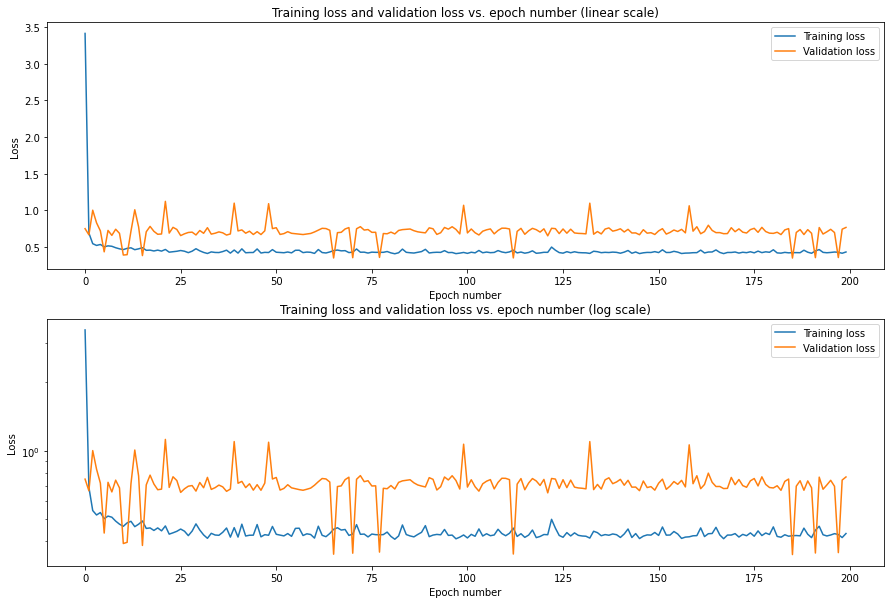

In [ ]:
#@markdown ##Play the cell to show a plot of training errors vs. epoch number

epochNumber = []
lossDataFromCSV = []
vallossDataFromCSV = []

with open(os.path.join(full_QC_model_path, 'Quality Control', 'training_evaluation.csv'),'r') as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[0]))
        vallossDataFromCSV.append(float(row[1]))

epochNumber = range(len(lossDataFromCSV))

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
plt.plot(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (linear scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()

plt.subplot(2,1,2)
plt.semilogy(epochNumber,lossDataFromCSV, label='Training loss')
plt.semilogy(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (log scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()
plt.savefig(os.path.join(full_QC_model_path, 'Quality Control', 'lossCurvePlots.png'))
plt.show()



## **5.2. Error mapping and quality metrics estimation**
---
<font size = 4>This section will calculate the Intersection over Union score for all the images provided in the Source_QC_folder and Target_QC_folder. The result for one of the image will also be displayed.

<font size = 4>The **Intersection over Union** metric is a method that can be used to quantify the percent overlap between the target mask and your prediction output. **Therefore, the closer to 1, the better the performance.** This metric can be used to assess the quality of your model to accurately predict nuclei. 

<font size = 4>The Input, Ground Truth, Prediction and IoU maps are shown below for the last example in the QC set.

<font size = 4> The results for all QC examples can be found in the "*Quality Control*" folder which is located inside your "model_folder".

### **Thresholds for image masks**

<font size = 4> Since the output from Unet is not a binary mask, the output images are converted to binary masks using thresholding. This section will test different thresholds (from 0 to 255) to find the one yielding the best IoU score compared with the ground truth. The best threshold for each image and the average of these thresholds will be displayed below. **These values can be a guideline when creating masks for unseen data in section 6.**

Model input size: 512x512
Number of dataset found in the folder: 7



Running QC on: 14.tif
Running QC on: 24.tif
Running QC on: 20.tif
Running QC on: 9.tif
Running QC on: 6.tif
Running QC on: 2.tif
Running QC on: 28.tif


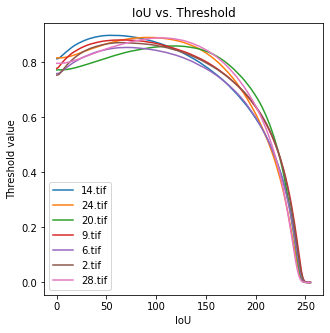

--------------------------------------------------------------


interactive(children=(Dropdown(description='file', options=('14.tif', '24.tif', '20.tif', '9.tif', '6.tif', '2…

--------------------------------------------------------------
Best average threshold is: 80
--------------------------------------------------------------


,IoU,IoU-optimised threshold
14.tif,0.898123,52
24.tif,0.890590,90
20.tif,0.859764,119
9.tif,0.881325,65
6.tif,0.854206,70


In [ ]:
# ------------- User input ------------
#@markdown ##Choose the folders that contain your Quality Control dataset
Source_QC_folder = "/content/gdrive/My Drive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/data4UNet/zhixuhao/val/image" #@param{type:"string"}
Target_QC_folder = "/content/gdrive/My Drive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/data4UNet/zhixuhao/val/label" #@param{type:"string"}


# ------------- Initialise folders ------------
# Create a quality control/Prediction Folder
prediction_QC_folder = os.path.join(full_QC_model_path, 'Quality Control', 'Prediction')
if os.path.exists(prediction_QC_folder):
  shutil.rmtree(prediction_QC_folder)

os.makedirs(prediction_QC_folder)


# ------------- Prepare the model and run predictions ------------

# Load the model
unet = load_model(os.path.join(full_QC_model_path, 'weights_best.hdf5'), custom_objects={'_weighted_binary_crossentropy': weighted_binary_crossentropy(np.ones(2))})
Input_size = unet.layers[0].output_shape[1:3]
print('Model input size: '+str(Input_size[0])+'x'+str(Input_size[1]))

# Create a list of sources
source_dir_list = os.listdir(Source_QC_folder)
number_of_dataset = len(source_dir_list)
print('Number of dataset found in the folder: '+str(number_of_dataset))

predictions = []
for i in tqdm(range(number_of_dataset)):
  predictions.append(predict_as_tiles(os.path.join(Source_QC_folder, source_dir_list[i]), unet))


# Save the results in the folder along with the masks according to the set threshold
saveResult(prediction_QC_folder, predictions, source_dir_list, prefix=prediction_prefix, threshold=None)

#-----------------------------Calculate Metrics----------------------------------------#

f = plt.figure(figsize=((5,5)))

with open(os.path.join(full_QC_model_path,'Quality Control', 'QC_metrics_'+QC_model_name+'.csv'), "w", newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["File name","IoU", "IoU-optimised threshold"])  

  # Initialise the lists 
  filename_list = []
  best_threshold_list = []
  best_IoU_score_list = []

  for filename in os.listdir(Source_QC_folder):

    if not os.path.isdir(os.path.join(Source_QC_folder, filename)):
      print('Running QC on: '+filename)
      test_input = io.imread(os.path.join(Source_QC_folder, filename), as_gray=True)
      test_ground_truth_image = io.imread(os.path.join(Target_QC_folder, filename), as_gray=True)

      (threshold_list, iou_scores_per_threshold) = getIoUvsThreshold(os.path.join(prediction_QC_folder, prediction_prefix+filename), os.path.join(Target_QC_folder, filename))
      plt.plot(threshold_list,iou_scores_per_threshold, label=filename)

      # Here we find which threshold yielded the highest IoU score for image n.
      best_IoU_score = max(iou_scores_per_threshold)
      best_threshold = iou_scores_per_threshold.index(best_IoU_score)

      # Write the results in the CSV file
      writer.writerow([filename, str(best_IoU_score), str(best_threshold)])

      # Here we append the best threshold and score to the lists
      filename_list.append(filename)
      best_IoU_score_list.append(best_IoU_score)
      best_threshold_list.append(best_threshold)

# Display the IoV vs Threshold plot
plt.title('IoU vs. Threshold')
plt.ylabel('Threshold value')
plt.xlabel('IoU')
plt.legend()
plt.show()


# Table with metrics as dataframe output
pdResults = pd.DataFrame(index = filename_list)
pdResults["IoU"] = best_IoU_score_list
pdResults["IoU-optimised threshold"] = best_threshold_list



average_best_threshold = sum(best_threshold_list)/len(best_threshold_list)


# ------------- For display ------------
print('--------------------------------------------------------------')
@interact
def show_QC_results(file=os.listdir(Source_QC_folder)):
  
  plt.figure(figsize=(25,5))
  #Input
  plt.subplot(1,4,1)
  plt.axis('off')
  plt.imshow(plt.imread(os.path.join(Source_QC_folder, file)), aspect='equal', cmap='gray', interpolation='nearest')
  plt.title('Input')

  #Ground-truth
  plt.subplot(1,4,2)
  plt.axis('off')
  test_ground_truth_image = io.imread(os.path.join(Target_QC_folder, file),as_gray=True)
  plt.imshow(test_ground_truth_image, aspect='equal', cmap='Greens')
  plt.title('Ground Truth')

  #Prediction
  plt.subplot(1,4,3)
  plt.axis('off')
  test_prediction = plt.imread(os.path.join(prediction_QC_folder, prediction_prefix+file))
  test_prediction_mask = np.empty_like(test_prediction)
  test_prediction_mask[test_prediction > average_best_threshold] = 255
  test_prediction_mask[test_prediction <= average_best_threshold] = 0
  plt.imshow(test_prediction_mask, aspect='equal', cmap='Purples')
  plt.title('Prediction')

  #Overlay
  plt.subplot(1,4,4)
  plt.axis('off')
  plt.imshow(test_ground_truth_image, cmap='Greens')
  plt.imshow(test_prediction_mask, alpha=0.5, cmap='Purples')
  metrics_title = 'Overlay (IoU: ' + str(round(pdResults.loc[file]["IoU"],3)) + ' T: ' + str(round(pdResults.loc[file]["IoU-optimised threshold"])) + ')'
  plt.title(metrics_title)



print('--------------------------------------------------------------')
print('Best average threshold is: '+str(round(average_best_threshold)))
print('--------------------------------------------------------------')

pdResults.head()



## **5.3. Export your model as a DeepImageJ model**
---
<font size = 4>This section exports the model into a DeepImageJ compatible format and stores the new files in the model folder specified at the beginning of Section 5. 

<font size = 4>Once the cell is executed, you will find a new zip file with the name specified in `Trained_model_name`. Download it, unzip its contents and place them in a new folder at ImageJ/models/ or Fiji/models/ in your local machine. Execute DeepImageJ Explore or DeepImageJ Run to use it in ImageJ.

<font size = 4>  More information at https://deepimagej.github.io/deepimagej/

In [ ]:
# ------------- User input ------------
# information about the model
#@markdown ##Introduce the metadata of the model architecture:
Trained_model_name    = "2D UNet - ZeroCostDL4Mic" #@param {type:"string"}
Trained_model_authors    =  "" #@param {type:"string"}
Trained_model_credits =  "" #@param {type:"string"}
Trained_model_references = "Ronneberger et al. arXiv in 2015; Falk et al. Nature Methods 2019;  Lucas von Chamier et al. biorXiv 2020" #@param {type:"string"}

#@markdown ##Choose a threshold for DeepImageJ's postprocessing macro:
Use_The_Best_Average_Threshold = True #@param {type:"boolean"}
#@markdown ###If not, please input:
threshold = 85 #@param {type:"number"}

#@markdown ##Introduce the pixel size (in microns) of the image provided as an example of the model processing:
# information about the example image
PixelSize = 0.0004 #@param {type:"number"}
#@markdown ##Do you want to choose the exampleimage?
default_example_image = True #@param {type:"boolean"}
#@markdown ###If not, please input:
fileID    =  "" #@param {type:"string"}


if Use_The_Best_Average_Threshold:
    threshold = np.copy(average_best_threshold)

from skimage import io

if default_example_image:
    source_dir_list = os.listdir(Source_QC_folder)
    fileID = os.path.join(Source_QC_folder, source_dir_list[0])
    

# Read the input image
test_img = io.imread(fileID)

# Load the model
unet = load_model(os.path.join(full_QC_model_path, 'weights_best.hdf5'), custom_objects={'_weighted_binary_crossentropy': weighted_binary_crossentropy(np.ones(2))})
test_prediction = predict_as_tiles(fileID, unet)
# test_prediction = io.imread(os.path.join(prediction_QC_folder, prediction_prefix+fileID))
# # Binarize it with the threshold chosen
test_prediction_mask = convert2Mask(test_prediction, threshold)

In [ ]:
#@markdown ##Run this cell to export the model to DeepImageJ's format.

import urllib
import xml.etree.ElementTree as ET
import shutil
import numpy as np

class DeepImageJConfig:    
    def __init__(self, tf_model):
        # ModelInformation
        self.Name       = 'null'
        self.Authors    = 'null'
        self.URL        = 'null'
        self.Credits    = 'null'
        self.Version    = 'null'
        self.References = 'null'
        self.Date       = time.ctime()
        # Same value as 2**pooling_steps 
        # (related to encoder-decoder archtiectures) when the input size is not
        # fixed
        self.MinimumSize = '8'
        self.get_dimensions(tf_model)
        # Receptive field of the network to process input 
        self.Padding = np.str(self._pixel_half_receptive_field(tf_model))
        self.Preprocessing = list()
        self.Postprocessing = list()
        self.Preprocessing_files = list()
        self.Postprocessing_files = list()
        
    def get_dimensions(self, tf_model):
        """
        Calculates the array organization and shapes of inputs and outputs.
        """
        input_dim   = tf_model.input_shape
        output_dim  = tf_model.output_shape
        # Deal with the order of the dimensions and whether the size is fixed 
        # or not
        if input_dim[2] is None:
            self.FixedPatch  = 'false'
            self.PatchSize   = self.MinimumSize
            if input_dim[-1] is None:
              self.InputOrganization0 = 'NCHW'
              self.Channels           = np.str(input_dim[1])
            else:
              self.InputOrganization0 = 'NHWC'
              self.Channels           = np.str(input_dim[-1])
            
            if output_dim[-1] is None:
              self.OutputOrganization0 = 'NCHW'    
            else:
              self.OutputOrganization0 = 'NHWC'
        else:
            self.FixedPatch = 'true'
            self.PatchSize  = np.str(input_dim[2])

            if input_dim[-1] < input_dim[-2] and input_dim[-1] < input_dim[-3]:
              self.InputOrganization0 = 'NHWC'
              self.Channels           = np.str(input_dim[-1])
            else:
              self.InputOrganization0 = 'NCHW'
              self.Channels           = np.str(input_dim[1])

            if output_dim[-1] < output_dim[-2] and output_dim[-1] < output_dim[-3]:
              self.OutputOrganization0 = 'NHWC'
            else:
              self.OutputOrganization0 = 'NCHW'
        
        # Adapt the format from brackets to parenthesis      
        input_dim = np.str(input_dim)
        input_dim = input_dim.replace('(', ',')
        input_dim = input_dim.replace(')', ',')
        input_dim = input_dim.replace('None', '-1')
        input_dim = input_dim.replace(' ', "")
        self.InputTensorDimensions = input_dim        
        
    def _pixel_half_receptive_field(self, tf_model):
        """
        The halo is equivalent to the receptive field of one pixel. This value 
        is used for image reconstruction when a entire image is processed.
        """
        input_shape = tf_model.input_shape
        
        if self.FixedPatch == 'false':
          min_size = 50*np.int(self.MinimumSize)

          if self.InputOrganization0 == 'NHWC':
            null_im = np.zeros((1, min_size, min_size, input_shape[-1])
                                , dtype=np.float32)
          else:
            null_im = np.zeros((1, input_shape[1], min_size, min_size)
                                , dtype=np.float32)
        else:
          null_im   = np.zeros((input_shape[1:])
                                , dtype=np.float32)
          null_im   = np.expand_dims(null_im, axis=0)
          min_size  = np.int(self.PatchSize)

        point_im = np.zeros_like(null_im)
        min_size = np.int(min_size/2)

        if self.InputOrganization0 == 'NHWC':
            point_im[0,min_size,min_size]   = 1
        else:
            point_im[0,:,min_size,min_size] = 1

        result_unit = tf_model.predict(np.concatenate((null_im, point_im)))

        D = np.abs(result_unit[0]-result_unit[1])>0

        if self.InputOrganization0 == 'NHWC':
            D = D[:,:,0]
        else:
            D = D[0,:,:]

        ind   = np.where(D[:min_size,:min_size]==1)
        halo  = np.min(ind[1])
        halo  = min_size-halo+1

        return halo
    
    class TestImage:
        def __add__(self, input_im, output_im, pixel_size):
            """
            pixel size must be given in microns
            """
            self.Input_shape = '{0}x{1}'.format(input_im.shape[0], input_im.shape[1])
            self.InputImage = input_im
            self.Output_shape = '{0}x{1}'.format(output_im.shape[0], output_im.shape[1])
            self.OutputImage = output_im
            self.MemoryPeak = 'null'
            self.Runtime = 'null'
            self.PixelSize = '{0}µmx{1}µm'.format(pixel_size, pixel_size)

    def add_test_info(self, input_im, output_im, pixel_size):
        self.test_info = self.TestImage()
        self.test_info.__add__(input_im, output_im, pixel_size)

    def add_preprocessing(self, file, name):
        file_extension = file.split('.')[-1]
        name = name + '.' + file_extension
        if name.startswith('preprocessing'):
            self.Preprocessing.insert(len(self.Preprocessing),name)
        else:
            name = "preprocessing_"+name
            self.Preprocessing.insert(len(self.Preprocessing),name)
        self.Preprocessing_files.insert(len(self.Preprocessing_files), file)

    def add_postprocessing(self, file, name):
        file_extension = file.split('.')[-1]
        name = name + '.' + file_extension
        if name.startswith('postprocessing'):
            self.Postprocessing.insert(len(self.Postprocessing), name)
        else:
            name = "postprocessing_" + name
            self.Postprocessing.insert(len(self.Postprocessing), name)
        self.Postprocessing_files.insert(len(self.Postprocessing_files), file)


    def export_model(self, tf_model,deepimagej_model_path, **kwargs):
        """
        Main function to export the model as a bundled model of DeepImageJ
        tf_model:              tensorflow/keras model
        deepimagej_model_path: directory where DeepImageJ model is stored.
        """
        # Save the mode as protobuffer
        self.save_tensorflow_pb(tf_model, deepimagej_model_path)

        # extract the information about the testing image
        test_info = self.test_info
        io.imsave(os.path.join(deepimagej_model_path,'exampleImage.tiff'), self.test_info.InputImage)
        io.imsave(os.path.join(deepimagej_model_path,'resultImage.tiff'), self.test_info.OutputImage)
        print("Example images stored.")

        # write the DeepImageJ configuration as an xml file
        write_config(self, test_info, deepimagej_model_path)
        
        # Add preprocessing and postprocessing macros. 
        # More than one is available, but the first one is set by default.
        for i in range(len(self.Preprocessing)):
          shutil.copy2(self.Preprocessing_files[i], os.path.join(deepimagej_model_path, self.Preprocessing[i]))
          print("ImageJ macro {} included in the bundled model.".format(self.Preprocessing[i]))
        
        for i in range(len(self.Postprocessing)):
          shutil.copy2(self.Postprocessing_files[i], os.path.join(deepimagej_model_path, self.Postprocessing[i]))
          print("ImageJ macro {} included in the bundled model.".format(self.Postprocessing[i]))
        
        # Zip the bundled model to download
        shutil.make_archive(deepimagej_model_path, 'zip', deepimagej_model_path)
        print("DeepImageJ model was successfully exported as {0}.zip. You can download and start using it in DeepImageJ.".format(deepimagej_model_path))
          

    def save_tensorflow_pb(self,tf_model, deepimagej_model_path):
        # Check whether the folder to save the DeepImageJ bundled model exists.
        # If so, it needs to be removed (TensorFlow requirements)
        # -------------- Other definitions -----------
        W  = '\033[0m'  # white (normal)
        R  = '\033[31m' # red
        if os.path.exists(deepimagej_model_path):
            print(R+'!! WARNING: DeepImageJ model folder already existed and has been removed !!'+W)
            shutil.rmtree(deepimagej_model_path)

        import tensorflow as tf
        TF_VERSION = tf.__version__
        print("DeepImageJ model will be exported using TensorFlow version {0}".format(TF_VERSION))
        if TF_VERSION[:3] == "2.3":
            print(R+"DeepImageJ plugin is only compatible with TensorFlow version 1.x, 2.0.0, 2.1.0 and 2.2.0. Later versions are not suported in DeepImageJ."+W)
        
        def _save_model():
            if tf_version==2:
                """TODO: change it once TF 2.3.0 is available in JAVA"""
                from tensorflow.compat.v1 import saved_model
                from tensorflow.compat.v1.keras.backend import get_session
            else:
                from tensorflow import saved_model
                from keras.backend import get_session

            builder = saved_model.builder.SavedModelBuilder(deepimagej_model_path)

            signature = saved_model.signature_def_utils.predict_signature_def(
                                              inputs  = {'input':  tf_model.input},
                                              outputs = {'output': tf_model.output} )
            
            signature_def_map = { saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY: signature }
            
            builder.add_meta_graph_and_variables( get_session(),
                                                  [saved_model.tag_constants.SERVING], 
                                                  signature_def_map=signature_def_map )
            builder.save()
            print("TensorFlow model exported to {0}".format(deepimagej_model_path))

        if TF_VERSION[0] == '1':
            tf_version = 1
            _save_model()
        else:
            tf_version = 2
            """TODO: change it once TF 2.3.0 is available in JAVA"""
            from tensorflow.keras.models import clone_model
            _weights = tf_model.get_weights(tf_model)
            with tf.Graph().as_default():
                # clone model in new graph and set weights
                _model = clone_model(tf_model)
                _model.set_weights(_weights)
                _save_model()


def write_config(Config, TestInfo, config_path):
    """
    - Config:       Class with all the information about the model's architecture and pre/post-processing
    - TestInfo:   Metadata of the image provided as an example
    - config_path:  path to the template of the configuration file. 
    It can be downloaded from: 
      https://raw.githubusercontent.com/deepimagej/python4deepimagej/blob/master/xml/config_template.xml
    The function updates the fields in the template provided with the
    information about the model and the example image.
    """
    urllib.request.urlretrieve("https://raw.githubusercontent.com/deepimagej/python4deepimagej/master/xml/config_template.xml", "config_template.xml")
    try:
        tree = ET.parse('config_template.xml')
        root = tree.getroot()
    except:
        print("config_template.xml not found.")
    
    # WorkCitation-Credits
    root[0][0].text = Config.Name
    root[0][1].text = Config.Authors
    root[0][2].text = Config.URL
    root[0][3].text = Config.Credits
    root[0][4].text = Config.Version
    root[0][5].text = Config.Date
    root[0][6].text = Config.References
    
    # ExampleImage
    root[1][0].text = TestInfo.Input_shape
    root[1][1].text = TestInfo.Output_shape
    root[1][2].text = TestInfo.MemoryPeak
    root[1][3].text = TestInfo.Runtime
    root[1][4].text = TestInfo.PixelSize
    
    # ModelArchitecture
    root[2][0].text = 'tf.saved_model.tag_constants.SERVING'
    root[2][1].text = 'tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY'
    root[2][2].text = Config.InputTensorDimensions
    root[2][3].text = '1'
    root[2][4].text = 'input'
    root[2][5].text = Config.InputOrganization0
    root[2][6].text = '1'
    root[2][7].text = 'output'
    root[2][8].text = Config.OutputOrganization0
    root[2][9].text = Config.Channels
    root[2][10].text = Config.FixedPatch
    root[2][11].text = Config.MinimumSize
    root[2][12].text = Config.PatchSize
    root[2][13].text = 'true'
    root[2][14].text = Config.Padding
    root[2][15].text = Config.Preprocessing[0]
    print("Preprocessing macro '{}' set by default".format(Config.Preprocessing[0]))
    root[2][16].text = Config.Postprocessing[0]
    print("Postprocessing macro '{}' set by default".format(Config.Postprocessing[0]))
    root[2][17].text = '1'    
    try:
        tree.write(os.path.join(config_path,'config.xml'),encoding="UTF-8",xml_declaration=True, )
        print("DeepImageJ configuration file exported.")
    except:
        print("The directory {} does not exist.".format(config_path))

# ------------------------------------------------------------------------------
## Run the code to export the model ##
# ------------------------------------------------------------------------------
dij_config = DeepImageJConfig(unet)

# Update model information
dij_config.Authors = Trained_model_authors
dij_config.Name = Trained_model_name
dij_config.Credits = Trained_model_credits
dij_config.References = Trained_model_references

try: 
  dij_config.MinimumSize = np.str(2**(pooling_steps))
except:
  pooling_steps = 0
  for keras_layer in unet.layers:
    if keras_layer.name.startswith('max') or "pool" in keras_layer.name:
      pooling_steps += 1
  dij_config.MinimumSize = np.str(2**(pooling_steps))

# Add the information about the test image
dij_config.add_test_info(test_img, test_prediction_mask, PixelSize)

## Prepare preprocessing file
path_preprocessing = "PercentileNormalization.ijm"
urllib.request.urlretrieve("https://raw.githubusercontent.com/deepimagej/imagej-macros/master/PercentileNormalization.ijm", path_preprocessing )

## Prepare postprocessing file
path_postprocessing = "8bitBinarize.ijm"
urllib.request.urlretrieve("https://raw.githubusercontent.com/deepimagej/imagej-macros/master/8bitBinarize.ijm", path_postprocessing )

# Modify the threshold in the macro to the chosen threshold
ijmacro = open(path_postprocessing,"r")  
list_of_lines = ijmacro. readlines()
# Line 21 is the one corresponding to the optimal threshold
list_of_lines[21] = "optimalThreshold = {}\n".format(threshold)
ijmacro.close()
ijmacro = open(path_postprocessing,"w")  
ijmacro. writelines(list_of_lines)
ijmacro. close()

# Include the info about the macross 
dij_config.add_preprocessing(path_preprocessing, "preprocessing")
dij_config.add_postprocessing(path_postprocessing, "postprocessing")

## EXPORT THE MODEL
deepimagej_model_path = os.path.join(full_QC_model_path, Trained_model_name)
dij_config.export_model(unet, deepimagej_model_path)

!! WARNING: DeepImageJ model folder already existed and has been removed !!
DeepImageJ model will be exported using TensorFlow version 1.15.2
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /content/gdrive/My Drive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/UNet_EM/2D UNet - ZeroCostDL4Mic/saved_model.pb
TensorFlow model exported to /content/gdrive/My Drive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/UNet_EM/2D UNet - ZeroCostDL4Mic
Example images stored.
Preprocessing macro 'preprocessing.ijm' set by default
Postprocessing macro 'postprocessing.ijm' set by default
DeepImageJ configuration file exported.
ImageJ macro preprocessing.ijm included in the bundled model.
ImageJ macro postprocessing.ijm included in the bundled model.
DeepImageJ model was successfully exported as /content/gdrive/My Drive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/UNet_EM/2D UNet - ZeroCostDL4Mic.zip. You can dow

# **6. Using the trained model**

---
<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

## **6.1 Generate prediction(s) from unseen dataset**
---

<font size = 4>The current trained model (from section 4.1) can now be used to process images. If you want to use an older model, untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Result_folder** folder.

<font size = 4>**`Data_folder`:** This folder should contain the images that you want to use your trained network on for processing.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output images.

<font size = 4> Once the predictions are complete the cell will display a random example prediction beside the input image and the calculated mask for visual inspection.

<font size = 4> **Troubleshooting:** If there is a low contrast image warning when saving the images, this may be due to overfitting of the model to the data. It may result in images containing only a single colour. Train the network again with different network hyperparameters.

In [ ]:
# ------------- Initial user input ------------
#@markdown ###Provide the path to your dataset and to the folder where the prediction will be saved (Result folder), then play the cell to predict output on your unseen images.
Data_folder = '/content/gdrive/My Drive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/data4UNet/zhixuhao/test/image' #@param {type:"string"}
Results_folder = '/content/gdrive/My Drive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/UNet_EM/results' #@param {type:"string"}

#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

Prediction_model_folder = "" #@param {type:"string"}

#Here we find the loaded model name and parent path
Prediction_model_name = os.path.basename(Prediction_model_folder)
Prediction_model_path = os.path.dirname(Prediction_model_folder)


# ------------- Failsafes ------------
if (Use_the_current_trained_model): 
  print("Using current trained network")
  Prediction_model_name = model_name
  Prediction_model_path = model_path

full_Prediction_model_path = os.path.join(Prediction_model_path, Prediction_model_name)
if os.path.exists(full_Prediction_model_path):
  print("The "+Prediction_model_name+" network will be used.")
else:
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


# ------------- Prepare the model and run predictions ------------

# Load the model and prepare generator

unet = load_model(os.path.join(Prediction_model_path, Prediction_model_name, 'weights_best.hdf5'), custom_objects={'_weighted_binary_crossentropy': weighted_binary_crossentropy(np.ones(2))})
Input_size = unet.layers[0].output_shape[1:3]
print('Model input size: '+str(Input_size[0])+'x'+str(Input_size[1]))

# Create a list of sources
source_dir_list = os.listdir(Data_folder)
number_of_dataset = len(source_dir_list)
print('Number of dataset found in the folder: '+str(number_of_dataset))

predictions = []
for i in tqdm(range(number_of_dataset)):
  predictions.append(predict_as_tiles(os.path.join(Data_folder, source_dir_list[i]), unet))
  # predictions.append(prediction(os.path.join(Data_folder, source_dir_list[i]), os.path.join(Prediction_model_path, Prediction_model_name)))


# Save the results in the folder along with the masks according to the set threshold
saveResult(Results_folder, predictions, source_dir_list, prefix=prediction_prefix, threshold=None)


# ------------- For display ------------
print('--------------------------------------------------------------')

def show_prediction_mask(file=os.listdir(Data_folder), threshold=(0,255,1)):

  plt.figure(figsize=(18,6))
  # Wide-field
  plt.subplot(1,3,1)
  plt.axis('off')
  img_Source = plt.imread(os.path.join(Data_folder, file))
  plt.imshow(img_Source, cmap='gray')
  plt.title('Source image',fontsize=15)
  # Prediction
  plt.subplot(1,3,2)
  plt.axis('off')
  img_Prediction = plt.imread(os.path.join(Results_folder, prediction_prefix+file))
  plt.imshow(img_Prediction, cmap='gray')
  plt.title('Prediction',fontsize=15)

  # Thresholded mask
  plt.subplot(1,3,3)
  plt.axis('off')
  img_Mask = convert2Mask(img_Prediction, threshold)
  plt.imshow(img_Mask, cmap='gray')
  plt.title('Mask (Threshold: '+str(round(threshold))+')',fontsize=15)


interact(show_prediction_mask, continuous_update=False);



Using current trained network
The UNet_EM network will be used.
Model input size: 512x512
Number of dataset found in the folder: 30



--------------------------------------------------------------


interactive(children=(Dropdown(description='file', options=('14.tif', '12.tif', '10.tif', '8.tif', '13.tif', '…

## **6.2. Export results as masks**
---


In [ ]:

# @markdown #Play this cell to save results as masks with the chosen threshold
threshold =  140#@param {type:"number"}

saveResult(Results_folder, predictions, source_dir_list, prefix=prediction_prefix, threshold=threshold)
print('-------------------')
print('Masks were saved in: '+Results_folder)




-------------------
Masks were saved in: /content/gdrive/My Drive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/UNet_EM/results


## **6.3. Download your predictions**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.

#**Thank you for using U-Net!**